<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/PIB_PRODUCTO_INTERNO_BRUTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from openpyxl import workbook   # leer excel 
from openpyxl import load_workbook 
import pandas as pd
import statsmodels.api as sm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Obtener datos**

In [3]:
Produccion_Corrientes = load_workbook("/content/drive/MyDrive/U CENTRAL ECONOMÍA/DOCUMENTOS ADICIONALES/CURSOS/MEDICION ECONOMICA/PRODUCTO INTERNO BRUTO/Anexos_produccion_corrientes_I_2022.xlsx") 

In [4]:
Produccion_constantes = load_workbook("/content/drive/MyDrive/U CENTRAL ECONOMÍA/DOCUMENTOS ADICIONALES/CURSOS/MEDICION ECONOMICA/PRODUCTO INTERNO BRUTO/Anexos_produccion_constantes_I_2022.xlsx") 

In [5]:
PIB  = Produccion_constantes["Cuadro 1"] 

In [6]:
PIB_Desestacionalizado  = Produccion_constantes["Cuadro 4"] 

In [7]:
for Tasa_Crecimiento_Anual in PIB .iter_rows(min_row = 62,max_row= 62, min_col=8, max_col = 200,  values_only=True):
   print(Tasa_Crecimiento_Anual) # row = Filas , Col =  Columnas 

(6.3214383117893505, 5.303381248417139, 7.6676064207295695, 7.442040194053391, 6.800034781467417, 6.86230872113309, 6.842359079910395, 6.48187764157646, 5.14227936031763, 4.797070622528693, 3.3292364549272264, 0.34026716974257454, 0.26317598922101126, 0.6616464213338418, 0.48228119098523337, 2.979170198847342, 3.6596092102116273, 4.662812151271652, 4.101177215637037, 5.430297974890678, 6.816810564221342, 6.679971467396257, 7.866993879959324, 6.456535845243167, 5.9424495064994005, 4.959903516874277, 2.452009547394013, 2.603828747193276, 2.665230470215519, 5.338729445988349, 6.078551209011351, 6.2464963789477395, 6.43427416280538, 3.418592625795469, 4.255424062684739, 4.0534546820892245, 2.94483968307631, 3.4834990078099253, 3.742371581292474, 1.7640540699155167, 2.283336275884949, 2.060460672879458, 1.4963638230261864, 2.4972706306595143, 1.0292388120206226, 1.2711769410680347, 1.6912970408056651, 1.4192007032890501, 1.6096512487537638, 2.775089148281282, 2.8773568243382073, 2.915027175

In [8]:
for PIB_Miles_de_millones in PIB .iter_rows(min_row = 29,max_row= 29, min_col=4, max_col = 200,  values_only=True):
   print(PIB_Miles_de_millones ) # row = Filas , Col =  Columnas 

(120001.40028252866, 125296.3456748175, 128934.3088434943, 140620.94519915953, 127587.21477467212, 131941.28857628768, 138820.48418690136, 151086.01246213878, 136263.18975605536, 140995.50712903365, 148319.0801914394, 160879.2229234716, 143270.22363859144, 147759.16118060588, 153256.97307878552, 161426.64210201715, 143647.27646691145, 148736.80438275027, 153996.10263381782, 166235.81651652043, 148904.2054267127, 155672.1221709223, 160311.755708005, 175262.91669436, 159054.7230328107, 166070.97551463012, 172923.4717184091, 186578.82973415003, 168506.46963673795, 174307.93566968766, 177163.5717546297, 191437.0229389446, 172997.55540978076, 183613.7647579797, 187932.55018744842, 203395.12964479113, 184128.69241979718, 189890.7713799414, 195929.87714974215, 211639.65905051935, 189550.9872221049, 196505.6145168843, 203262.30119145536, 215373.09706955534, 193879.07367464527, 200554.5354240048, 206303.84473233484, 220751.54616901517, 195874.55234929078, 203103.9384325809, 209793.0555533611, 2

In [9]:
for Tasa_Crecimiento_Anual_Desestacionalizado in PIB_Desestacionalizado .iter_rows(min_row = 62,max_row= 62, min_col=8, max_col = 200,  values_only=True):
   print(Tasa_Crecimiento_Anual_Desestacionalizado) # row = Filas , Col =  Columnas 

(2.0702787749022207, 1.3759711084749995, 2.043114013383345, 1.7994384900960512, 1.526139719549363, 1.2014686909999455, 2.1577506695528825, 1.4302717523856643, 0.5383666774136202, 0.04234962983680646, 1.2287160202105696, -1.446938154214891, 0.11126437891016394, 1.0231493590751768, 0.9596638174007097, 0.9990194785385711, 0.8875178708222791, 1.3524913419116729, 0.9208303384056649, 2.273779574993057, 1.8320411609061011, 1.6111317552514208, 2.033133720864271, 0.8618787431510668, 1.2408373507248456, 0.6164983250112499, -0.32133001293111363, 1.0821339652820967, 1.5967563398001232, 2.694064027893887, 0.607066843191518, 1.2629254920139061, 1.4208290568456334, 0.5138930470493648, 0.8297703485080916, 1.1784761049983246, 0.6526433948901484, 0.6451508011127771, 1.0589505172736722, -0.6533129072204815, 1.556591045136301, -0.03521595602059335, 0.4842441106316784, 0.446934490260702, -0.11260105999039638, 0.823879919047755, 0.463273141560137, 0.19340498841530973, 0.5785252161112737, 1.1462802092695483,

In [10]:
for PIB_Miles_de_millones_Desestacionalizado in PIB_Desestacionalizado .iter_rows(min_row = 29,max_row= 29, min_col=4, max_col = 200,  values_only=True):
   print(PIB_Miles_de_millones_Desestacionalizado ) # row = Filas , Col =  Columnas 

(126394.561593596, 128524.865426872, 128685.31757255, 131248.255265252, 133965.460036438, 135808.786061875, 138583.514401311, 141077.239500376, 143230.275287635, 144951.142201249, 148078.826442621, 150196.756068494, 151005.365353723, 151069.315566984, 152925.528448978, 150712.790630315, 150880.480280748, 152424.21294771, 153886.972968327, 155424.333803214, 156803.752541324, 158924.509718238, 160387.934818886, 164034.802921551, 167039.988029285, 169731.222320393, 173182.085036224, 174674.704614097, 176842.133591217, 177932.362382721, 177360.612299668, 179279.891726395, 182142.554763523, 187049.591810894, 188185.107863103, 190561.74556248, 193269.302214664, 194262.499720826, 195874.43234178, 198182.765722729, 199476.192453029, 200763.114706669, 202889.09674835, 201563.59609195, 204701.116978972, 204629.029523643, 205619.933547754, 206538.91994963, 206306.354936474, 208006.071566515, 208969.707828897, 209373.865668115, 210585.146276952, 212999.042132386, 215067.540318157, 215356.271272505

# **Crear serie de tiempo** 

## **Miles de millones**

In [11]:
for Trimestres  in PIB .iter_rows(min_row =13 ,max_row= 13, min_col=4, max_col = 200,  values_only=True):
   print(Trimestres ) # row = Filas , Col =  Columnas 

('I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', 'II', 'III', 'IV', 'I', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

In [12]:
Trimestres  = pd.DataFrame( Trimestres  ).dropna() #  Elimanar Celdas Vacias y converir en DATAFRAME 
Trimestres  .columns = [' Trimestres   ']
Trimestres  

,Trimestres
0,I
1,II
2,III
3,IV
4,I
...,...
64,I
65,II
66,III
67,IV


In [13]:
for Años  in PIB .iter_rows(min_row =12 ,max_row= 12, min_col=4, max_col = 200,  values_only=True):
   print(Años ) # row = Filas , Col =  Columnas 

(2005, None, None, None, 2006, None, None, None, 2007, None, None, None, 2008, None, None, None, 2009, None, None, None, 2010, None, None, None, 2011, None, None, None, 2012, None, None, None, 2013, None, None, None, 2014, None, None, None, 2015, None, None, None, 2016, None, None, None, 2017, None, None, None, 2018, None, None, None, 2019, None, None, None, '2020p', None, None, None, '2021pr', None, None, None, '2022pr', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

In [14]:
Años  = pd.DataFrame(Años).dropna() 
Años  .columns = ['Años']
Años  

,Años
0,2005
4,2006
8,2007
12,2008
16,2009
20,2010
24,2011
28,2012
32,2013
36,2014


In [15]:
Año_trimestre = pd.concat([Años,Trimestres ], axis=1,)
Año_trimestre

,Años,Trimestres
0,2005,I
1,NaN,II
2,NaN,III
3,NaN,IV
4,2006,I
...,...,...
64,2021pr,I
65,NaN,II
66,NaN,III
67,NaN,IV


## **Tasa de Crecimiento**

In [16]:
for Años_1  in PIB .iter_rows(min_row =78 ,max_row= 78, min_col=8, max_col = 200,  values_only=True):
   print(Años_1  ) # row = Filas , Col =  Columnas 

(2006, None, None, None, 2007, None, None, None, 2008, None, None, None, 2009, None, None, None, 2010, None, None, None, 2011, None, None, None, 2012, None, None, None, 2013, None, None, None, 2014, None, None, None, 2015, None, None, None, 2016, None, None, None, 2017, None, None, None, 2018, None, None, None, 2019, None, None, None, '2020p', None, None, None, '2021pr', None, None, None, '2022pr', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

In [17]:
Años_1   = pd.DataFrame(Años_1 ).dropna() 
Años_1   .columns = ['Años_1 ']
Años_1 

,Años_1
0,2006
4,2007
8,2008
12,2009
16,2010
20,2011
24,2012
28,2013
32,2014
36,2015


In [18]:
for Trimestres_1  in PIB .iter_rows(min_row =46 ,max_row= 46, min_col=8, max_col = 200,  values_only=True):
   print(Trimestres ) # row = Filas , Col =  Columnas 

    Trimestres   
0               I
1              II
2             III
3              IV
4               I
..            ...
64              I
65             II
66            III
67             IV
68              I

[69 rows x 1 columns]


In [19]:
Trimestres_1  = pd.DataFrame( Trimestres_1).dropna() #  Elimanar Celdas Vacias y converir en DATAFRAME 
Trimestres_1  .columns = [' Trimestres_1   ']
Trimestres_1  

,Trimestres_1
0,I
1,II
2,III
3,IV
4,I
...,...
60,I
61,II
62,III
63,IV


In [20]:
Año_trimestre_1 = pd.concat([Años_1,Trimestres_1], axis=1,)
Año_trimestre_1

,Años_1,Trimestres_1
0,2006,I
1,NaN,II
2,NaN,III
3,NaN,IV
4,2007,I
...,...,...
60,2021pr,I
61,NaN,II
62,NaN,III
63,NaN,IV


# **Tasa Crecimiento Anual PIB**

## **serie Original**

In [21]:
Tasa_Crecimiento_Anual  = pd.DataFrame(Tasa_Crecimiento_Anual).dropna() #  Elimanar Celdas Vacias y converir en DATAFRAME 
Tasa_Crecimiento_Anual.columns = ['Tasa_Crecimiento_Anual']
Tasa_Crecimiento_Anual = pd.concat([Año_trimestre_1,Tasa_Crecimiento_Anual], axis=1,)

,Años_1,Trimestres_1,Tasa_Crecimiento_Anual
60,2021pr,I,0.909189
61,NaN,II,18.305677
62,NaN,III,13.744592
63,NaN,IV,10.837724
64,2022pr,I,8.541361


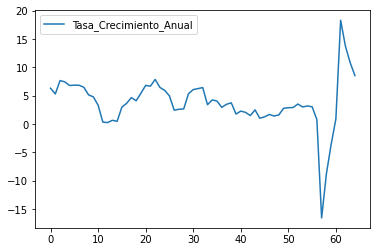

In [22]:
Tasa_Crecimiento_Anual.plot()
Tasa_Crecimiento_Anual.tail()

## **Serie Desestacionalizada**

In [23]:
Tasa_Crecimiento_Anual_Desestacionalizado  = pd.DataFrame(Tasa_Crecimiento_Anual_Desestacionalizado).dropna() #  Elimanar Celdas Vacias y converir en DATAFRAME 
Tasa_Crecimiento_Anual_Desestacionalizado.columns = ['Tasa_Crecimiento_Anual_Desestacionalizado']
Tasa_Crecimiento_Anual_Desestacionalizado = pd.concat([Año_trimestre_1,Tasa_Crecimiento_Anual_Desestacionalizado], axis=1,)

,Años_1,Trimestres_1,Tasa_Crecimiento_Anual_Desestacionalizado
60,2021pr,I,3.503681
61,NaN,II,-1.796005
62,NaN,III,6.362818
63,NaN,IV,2.522532
64,2022pr,I,0.995844


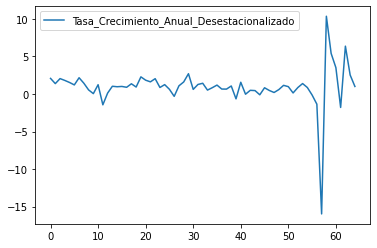

In [24]:
Tasa_Crecimiento_Anual_Desestacionalizado.plot()
Tasa_Crecimiento_Anual_Desestacionalizado.tail()

# **PIB_Miles_de_millones**

## **Serie Original**

In [25]:
PIB_Miles_de_millones  = pd.DataFrame( PIB_Miles_de_millones ).dropna() #  Elimanar Celdas Vacias y converir en DATAFRAME 
PIB_Miles_de_millones.columns = [' PIB_Miles_de_millones ']
PIB_Miles_de_millones = pd.concat([Años,Trimestres,PIB_Miles_de_millones], axis=1,)

In [ ]:
PIB_Miles_de_millones.plot()
PIB_Miles_de_millones.tail()

## **Serie Desestacionalizada**

In [27]:
PIB_Miles_de_millones_Desestacionalizado= pd.DataFrame( PIB_Miles_de_millones_Desestacionalizado ).dropna() #  Elimanar Celdas Vacias y converir en DATAFRAME 
PIB_Miles_de_millones_Desestacionalizado.columns = [' PIB_Miles_de_millones_Desestacionalizado ']
PIB_Miles_de_millones_Desestacionalizado  = pd.concat([Años,Trimestres,PIB_Miles_de_millones_Desestacionalizado  ], axis=1,)

In [ ]:
PIB_Miles_de_millones_Desestacionalizado.plot()
PIB_Miles_de_millones_Desestacionalizado.tail()

# **Descomposion de Series de Tiempos**

In [63]:
PIB_Miles_de_millones_ts =  PIB_Miles_de_millones.set_index('Años')
PIB_Miles_de_millones_ts = PIB_Miles_de_millones_ts[' PIB_Miles_de_millones ']

In [ ]:
decomposition = sm.tsa.seasonal_decompose(PIB_Miles_de_millones_ts, model='multiplicative',freq=3)
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
fig.show()